In [1]:
import pandas as pd

In [2]:
pob_Madrid_65_mas = pd.read_csv("poblacion_municipios_mayores65_madrid.csv", sep="\t",encoding= "latin-1")
residencias_madrid = pd.read_csv("residencias_madrid_municipios.csv", delimiter = ";", encoding= "latin-1")

In [3]:
residencias_madrid = residencias_madrid.drop(columns=["Vía", "Nombre vía", "Núm. Vía", "C. Postal", "Teléfono", "URL", "Latitud", "Longitud" ])
residencias_madrid = residencias_madrid.rename(columns={"Unnamed: 12": "Fecha"})
residencias_madrid = residencias_madrid.rename(columns={"Municipio": "Municipios"})
residencias_madrid["Municipios"] = residencias_madrid["Municipios"].str.replace("Álamo (El)", "Alamo (El)")
residencias_madrid["titularidad"] = residencias_madrid["Titularidad"].astype(str).apply(lambda x: 'titularidad pública' if 'Pública' in x else 'titularidad privada')
residencias_madrid = residencias_madrid.groupby(["Municipios", "titularidad"]).agg({"Plazas": "sum"}).reset_index()

# Agrupa los datos por municipio y titularidad y suma las plazas para cada grupo
residencias_madrid = residencias_madrid.groupby(["Municipios", "titularidad"]).sum().reset_index()

# Pivotea los datos para que la titularidad sea columnas y los municipios sean filas
residencias_madrid = residencias_madrid.pivot(index="Municipios", columns="titularidad")

# Renombra las columnas
residencias_madrid.columns = [" ".join(col).strip() for col in residencias_madrid.columns.values]

# Muestra el resultado
residencias_madrid.head()

residencias_madrid["Plazas titularidad pública"] = residencias_madrid["Plazas titularidad pública"].fillna(0)
residencias_madrid["Plazas titularidad privada"] = residencias_madrid["Plazas titularidad privada"].fillna(0)
residencias_madrid["plazas"] = residencias_madrid["Plazas titularidad privada"] + residencias_madrid["Plazas titularidad pública"]

residencias_madrid.reset_index(allow_duplicates=True,inplace=True)

residencias_madrid["Municipios"] = residencias_madrid["Municipios"].fillna(0).astype("str")
residencias_madrid["Plazas titularidad privada"] = residencias_madrid["Plazas titularidad privada"].fillna(0).astype("str")
residencias_madrid["Plazas titularidad pública"] = residencias_madrid["Plazas titularidad pública"].fillna(0).astype("str")
residencias_madrid["plazas"] = residencias_madrid["plazas"].fillna(0).astype("str")

residencias_madrid = residencias_madrid.apply(lambda x: x.str.strip())

residencias_madrid["Municipios"] = residencias_madrid["Municipios"].str.replace(r"[\(\),]", "")

#residencias_madrid['Plazas titularidad privada'] = residencias_madrid['Plazas titularidad privada'].astype('int64')
#residencias_madrid['Plazas titularidad pública'] = residencias_madrid['Plazas titularidad pública'].astype('int64')
# residencias_madrid['plazas'] = residencias_madrid['plazas'].astype('int64')



In [4]:
pob_Madrid_65_mas["Sexo"] = pob_Madrid_65_mas["Sexo"].fillna(0).astype("str")
pob_Madrid_65_mas["Provincias"] = pob_Madrid_65_mas["Provincias"].fillna(0).astype("str")
pob_Madrid_65_mas["Municipios"] = pob_Madrid_65_mas["Municipios"].fillna(0).astype("str")
pob_Madrid_65_mas["Edad (grupos quinquenales)"] = pob_Madrid_65_mas["Edad (grupos quinquenales)"].fillna(0).astype("str")
pob_Madrid_65_mas["Periodo"] = pob_Madrid_65_mas["Periodo"].fillna(0).astype("str")
pob_Madrid_65_mas["Total"] = pob_Madrid_65_mas["Total"].fillna(0).astype("str")
# quitar los espacios, por eso hemos pasado antes todo a str
pob_Madrid_65_mas = pob_Madrid_65_mas.apply(lambda x: x.str.strip())

pob_Madrid_65_mas["Total"] = pob_Madrid_65_mas["Total"].astype(str).apply(lambda x: int(x.replace('.', '')))
pob_Madrid_65_mas = pob_Madrid_65_mas.groupby(pob_Madrid_65_mas.index // 8).agg({'Municipios': 'first',
                                     "Edad (grupos quinquenales)": lambda x: ", ".join(x),
                                     "Periodo": lambda x: ", ".join(x),
                                     "Total": "sum"})

pob_Madrid_65_mas.at[0, "Municipios"] = "Total"

pob_Madrid_65_mas["Edad"] = pob_Madrid_65_mas["Edad (grupos quinquenales)"].apply(lambda x: "65 -100 años y mas")
pob_Madrid_65_mas.drop(columns=['Edad (grupos quinquenales)'], inplace=True)

pob_Madrid_65_mas["Año"] = pob_Madrid_65_mas["Periodo"].apply(lambda x: "2022")
pob_Madrid_65_mas.drop(columns=['Periodo'], inplace=True)

pob_Madrid_65_mas["Municipios"] = pob_Madrid_65_mas["Municipios"].replace("\d+", "", regex=True)

pob_Madrid_65_mas["Municipios"].fillna("Total", inplace= True)

pob_Madrid_65_mas.rename(columns={"Total": "Poblacion"}, inplace=True)

pob_Madrid_65_mas["Municipios"] = pob_Madrid_65_mas["Municipios"].str.replace("Álamo (El)", "Alamo (El)")

pob_Madrid_65_mas["Poblacion"] = pob_Madrid_65_mas["Poblacion"].fillna(0).astype("str")

# residencias_madrid["Municipios"] = residencias_madrid.index
# municipios = residencias_madrid[""]

pob_Madrid_65_mas["Municipios"] = pob_Madrid_65_mas["Municipios"].str.replace(r"[\(\),]", "")




In [5]:
pob_Madrid_65_mas.head()

,Municipios,Poblacion,Edad,Año
0,Total,1089051,65 -100 años y mas,2022
1,"Acebeda, La",300,65 -100 años y mas,2022
2,Ajalvir,5410,65 -100 años y mas,2022
3,Alameda del Valle,610,65 -100 años y mas,2022
4,"Álamo, El",18910,65 -100 años y mas,2022


In [6]:
residencias_madrid.head()

,Municipios,Plazas titularidad privada,Plazas titularidad pública,plazas
0,Alamo (El),638.0,0.0,638.0
1,Alcalá de Henares,978.0,653.0,1631.0
2,Alcobendas,887.0,201.0,1088.0
3,Alcorcón,470.0,218.0,688.0
4,Aldea del Fresno,165.0,0.0,165.0


In [7]:
# df_dict = {"df1": pob_Madrid_65_mas.set_index("Municipios"), "df2": residencias_madrid.set_index("Municipios")}
# df_merged_2 = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
# df_merged_2.head()

In [8]:
# df_merged = pd.merge(residencias_madrid, pob_Madrid_65_mas, how= "outer")
# df_merged.fillna(0, inplace=True)
# df_merged.head()
"""
nada, no se que falla, pero no doy con ello...
voy a unirlos en excel y lo vuelvo a importar, es que si no no puedo avanzar mas..
"""

'\nnada, no se que falla, pero no doy con ello...\nvoy a unirlos en excel y lo vuelvo a importar, es que si no no puedo avanzar mas..\n'

In [9]:
# with pd.ExcelWriter("mayores_madrid.xlsx", engine = "openpyxl") as writer: pob_Madrid_65_mas.to_excel(writer, index = False)

In [10]:
# with pd.ExcelWriter("resis_madrid.xlsx", engine = "openpyxl") as writer: residencias_madrid.to_excel(writer, index = False)

In [11]:
resis_madrid_merge = pd.read_csv("merge_madrid.csv", sep=";")

In [12]:
resis_madrid_merge.drop(resis_madrid_merge[resis_madrid_merge['Municipios'] == 'Total'].index, inplace=True)

In [13]:
resis_madrid_merge.head()

,Municipios,Poblacion,Edad,Año,Plazas titularidad privada,Plazas titularidad pública,plazas
1,"Acebeda, La",300,65 -100 años y mas,2022,0,0,0
2,Ajalvir,5410,65 -100 años y mas,2022,0,0,0
3,Alameda del Valle,610,65 -100 años y mas,2022,0,0,0
4,"Álamo, El",18910,65 -100 años y mas,2022,638,0,638
5,Alcalá de Henares,27475,65 -100 años y mas,2022,978,653,1631


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
numero_camas = {"Tipo de plaza": ["Públicas", "Privadas"], 
                "Numero de plazas": [resis_madrid_merge["Plazas titularidad pública"].sum(), resis_madrid_merge["Plazas titularidad privada"].sum()]}

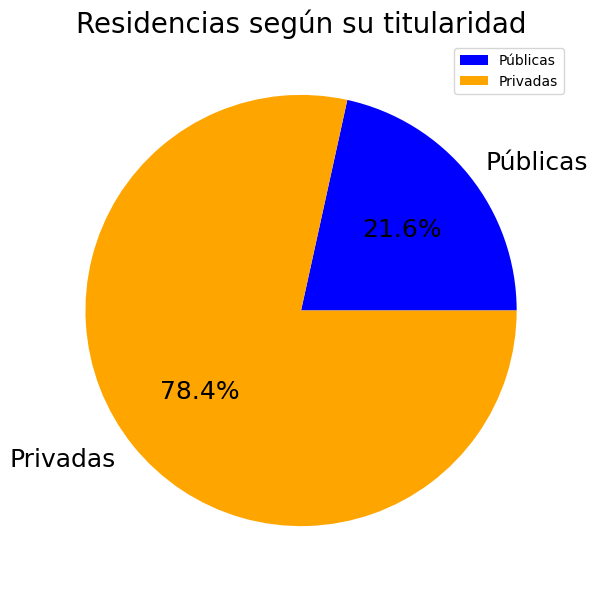

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(numero_camas['Numero de plazas'], labels=numero_camas['Tipo de plaza'], colors=['blue', 'orange'], autopct="%1.1f%%", textprops={"fontsize":18})
ax.set_title('Residencias según su titularidad', fontsize = 20)
ax.legend()
plt.show()

In [17]:
resis_madrid_merge.shape

(178, 7)

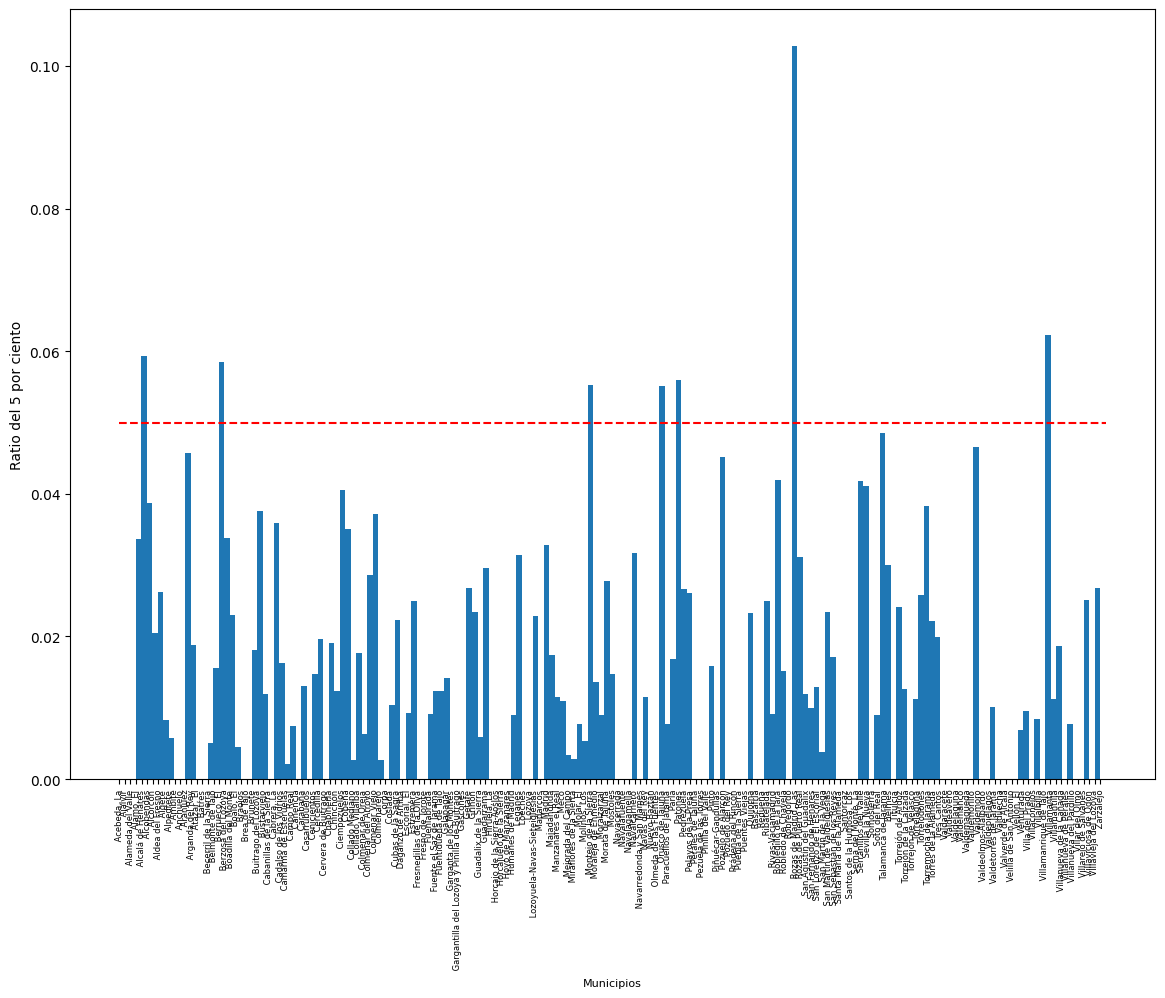

In [18]:
resis_madrid_merge["ratio"] = resis_madrid_merge["plazas"]/ resis_madrid_merge["Poblacion"]
plt.figure(figsize= (14,10))
plt.hist(resis_madrid_merge["Municipios"], weights = resis_madrid_merge["ratio"], bins= 178)
plt.xlabel("Municipios", fontsize = 8)
plt.ylabel("Ratio del 5 por ciento")
plt.hlines(y=0.05, xmin= 0, xmax=len(resis_madrid_merge["Municipios"]), colors = "red", linestyles = "dashed")
plt.xticks(rotation = 90, fontsize = 6)
plt.show()

In [19]:
resis_madrid_merge = resis_madrid_merge[(resis_madrid_merge[["Plazas titularidad privada","Plazas titularidad pública", "plazas"]] != 0).any(axis=1)]

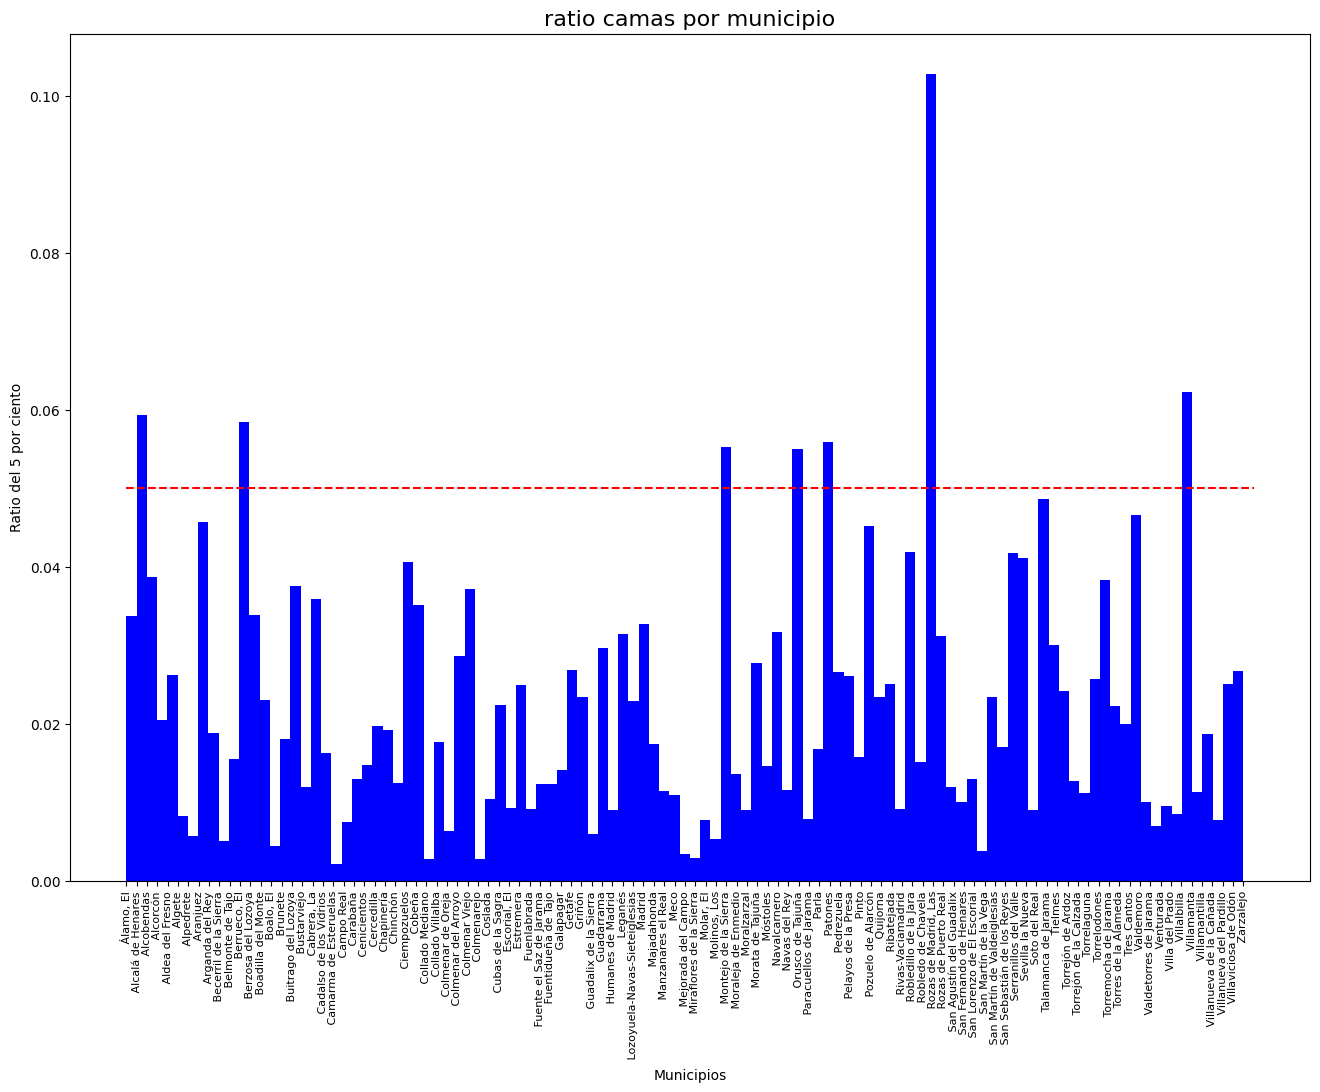

In [20]:
resis_madrid_merge["ratio"] = resis_madrid_merge["plazas"]/ resis_madrid_merge["Poblacion"]
plt.figure(figsize= (16,11))
plt.hist(resis_madrid_merge["Municipios"], weights = resis_madrid_merge["ratio"], bins= 109, color= "blue", )
plt.xlabel("Municipios", fontsize = 10)
plt.ylabel("Ratio del 5 por ciento")
plt.hlines(y=0.05, xmin= 0, xmax=len(resis_madrid_merge["Municipios"]), colors = "red", linestyles = "dashed")
plt.xticks(rotation = 90, fontsize = 8)
plt.title( "ratio camas por municipio", fontsize = 16)
plt.show()

In [21]:
# RATIO MEDIA
round(resis_madrid_merge["ratio"].mean()* 100,2)

2.23

In [22]:
# RATIO MEDIANA
round(resis_madrid_merge["ratio"].median()* 100, 2)

1.81

In [23]:
#  MUNICIPIO CON LA RATIO MINIMA
resis_madrid_merge.loc[resis_madrid_merge["ratio"].idxmin()]["Municipios"]


' Camarma de Esteruelas'

In [24]:
# RATIO MINIMA
round(resis_madrid_merge["ratio"].min()*100,2)

0.21

In [25]:
#  MUNICIPIO CON LA RATIO MINIMA
resis_madrid_merge.loc[resis_madrid_merge["ratio"].idxmax()]["Municipios"]

' Rozas de Madrid, Las'

In [26]:
# RATIO MAXIMA
round(resis_madrid_merge["ratio"].max()*100,2)

10.28

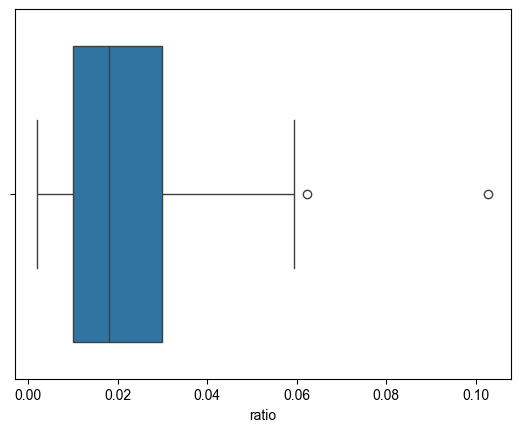

In [27]:
sns.boxplot(x=resis_madrid_merge["ratio"])
sns.set_style("whitegrid")


In [28]:
resis_madrid_merge.head()

,Municipios,Poblacion,Edad,Año,Plazas titularidad privada,Plazas titularidad pública,plazas,ratio
4,"Álamo, El",18910,65 -100 años y mas,2022,638,0,638,0.033739
5,Alcalá de Henares,27475,65 -100 años y mas,2022,978,653,1631,0.059363
6,Alcobendas,28096,65 -100 años y mas,2022,887,201,1088,0.038724
7,Alcorcón,33513,65 -100 años y mas,2022,470,218,688,0.020529
8,Aldea del Fresno,6300,65 -100 años y mas,2022,165,0,165,0.026190


In [29]:
# POBLACION + 64 AÑOS
Total_poblacion = resis_madrid_merge["Poblacion"].sum()
print(Total_poblacion)

2170518


In [30]:
# CAMAS DISPONIBLES
Total_camas = resis_madrid_merge["plazas"].sum()
print(Total_camas)

51908


In [31]:
# CAMAS ESTIMADAS NECESARIAS OMS
Camas_estimadas = round(Total_poblacion * 0.05,2)
print(Camas_estimadas)

108525.9


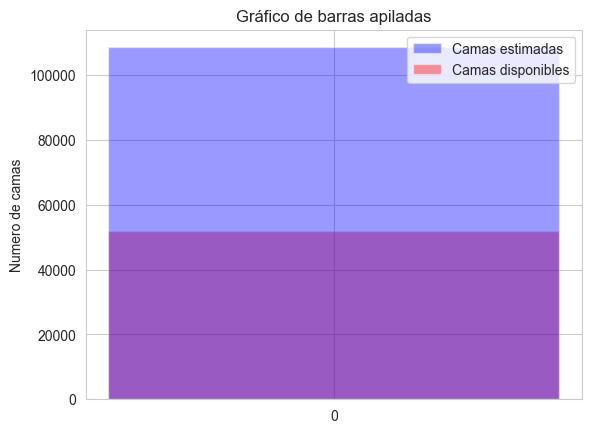

In [32]:
camas_estimadas = [Camas_estimadas]
camas_disponibles = [Total_camas]
x_pos = [0]
opacity = 0.4

fig, ax = plt.subplots()

rects1 = ax.bar(x_pos, camas_disponibles, alpha=opacity, color='r', label='Camas disponibles', width=0.2)
rects2 = ax.bar(x_pos, camas_estimadas, alpha=opacity, color='b', label='Camas estimadas', width=0.2)
ax.set_ylabel('Numero de camas')
ax.set_title('Gráfico de barras apiladas')
ax.legend((rects2[0], rects1[0]), ('Camas estimadas', 'Camas disponibles'))


ax.set_xticks(x_pos)


# Muestra el gráfico
plt.show()